In [9]:
import os
import click
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import numpy as np

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt 

In [1]:
import arrow
arrow.utcnow()

<Arrow [2023-11-27T00:04:03.298125+00:00]>

In [6]:
a = Time.now()
a, a + 1 * u.hour

(<Time object: scale='utc' format='datetime' value=2023-11-27 01:01:13.836675>,
 <Time object: scale='utc' format='datetime' value=2023-11-27 02:01:13.836675>)

In [5]:
a = arrow.utcnow()
a, a + 1 * u.hour

TypeError: Unsupported operand type(s) for ufunc add: 'Arrow,Quantity'

In [12]:
np.linspace(0, 24, 24*3600, endpoint=False).shape

(86400,)

In [ ]:
l, b = 0, 0
target = SkyCoord(f'{l} {b}', unit=(u.deg, u.deg), frame='galactic')
target = target.icrs

gbo = EarthLocation(lat=38.4*u.deg, lon=-79.8*u.deg, height=808*u.m)

t = np.linspace(0, 24, 1000)*u.hour



In [14]:
Time.now()

<Time object: scale='utc' format='datetime' value=2023-11-27 04:22:32.801407>

In [15]:
Time.now().iso

'2023-11-27 04:30:28.871'

In [39]:
l, b = 0, 0
target = SkyCoord(f'{l} {b}', unit=(u.deg, u.deg), frame='galactic')
target = target.icrs

gbt = EarthLocation(lat=38.4*u.deg, lon=-79.8*u.deg, height=808*u.m)

day_range = 30

ts = np.linspace(0, 24*day_range, 24*day_range*60, endpoint=False) * u.hour
ts = Time.now() + ts

altazframe_gbt = AltAz(obstime=ts, location=gbt)
targetaltazs_gbt = target.transform_to(altazframe_gbt)
alts = targetaltazs_gbt.alt
altz = alts.deg - 5.

starts = []
ends = []

for i in range(len(ts)):
    if altz[i] >= 0:
        if i == 0 or altz[i-1] < 0:
            starts.append(ts[i])
        elif i == len(ts) - 1:
            ends.append(ts[i])
    elif altz[i-1] >= 0:
        ends.append(ts[i])
len(starts), len(ends)

(30, 31)

In [30]:
vars(ts[0])

{'_time': <astropy.time.formats.TimeDatetime at 0x7faaa29f6ad0>,
 'location': None,
 '_format': 'datetime',
 'SCALES': ('tai', 'tcb', 'tcg', 'tdb', 'tt', 'ut1', 'utc')}

In [35]:
ts[0].value

datetime.datetime(2023, 11, 27, 6, 39, 11, 69473)

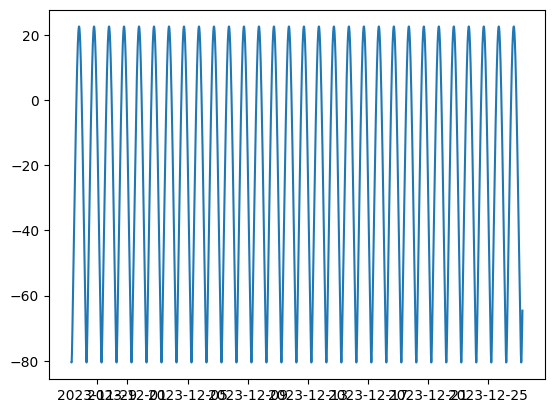

In [37]:
plt.plot([x.value for x in ts], alts)
plt.show()